**Importing Necessary Libraries**


In [5]:
import numpy #used for numerical analysis
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #Mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A layer consistes of a tensor-in tensor-out computation function
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense layer is the regular deeply connected
#Flatten-used for flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #Convolutional Layer
from keras.optimizers import Adam #optimizer
from keras.utils import np_utils #used for one-hot coding

**Load Data**

In [6]:
(x_train, y_train), (X_test, y_test)=mnist.load_data() #splitting the mnist data into train and test

In [7]:
print(x_train.shape)#shape is used for give the dimension values #60000-rows 28x28-pixels paint
(68000, 28, 28)
(10000, 28, 28)

(60000, 28, 28)


(10000, 28, 28)

**Understanding the data**

In [8]:
x_train[0] #printing the first image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
y_train[0] #print the label of first image

5

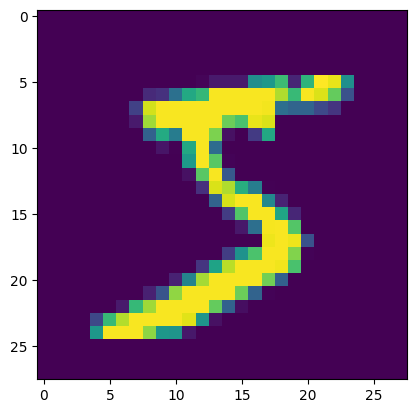

In [10]:
import matplotlib.pyplot as plt #used for data visualization 
plt.imshow(x_train[0])  #ploting the index=0 image


**Reshaping Dataset**

In [11]:

#Reshaping to format which CNN expects (batch, height, width, channels)
x_train=x_train.reshape(60000, 28, 28, 1).astype('float32') 
X_test= X_test.reshape(10000, 28, 28, 1).astype('float32')

**One-Hot Encoding**

In [12]:

#one hot encode
number_of_classes = 10 #storing the no. of classes in a variable
y_train= np_utils.to_categorical (y_train, number_of_classes) #converts the output in binary format
y_test= np_utils.to_categorical (y_test, number_of_classes)

In [13]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

**Creating the Model**

In [14]:

#create model
model=Sequential()
#adding model Layer
model.add(Conv2D (64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D (32, (3, 3), activation='relu'))
#model.add(Conv2D (32, (3, 3), activation="relu"))
#flatten the dimension of the image
model.add(Flatten())
#output Layer with 10 neurons
model.add(Dense(number_of_classes, activation='softmax'))

**Compiling the Model**

In [15]:
#compile model
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])


**Fitting the Model**

In [16]:
#fit the model
model.fit(x_train,y_train, validation_data=(X_test,y_test),epochs=5,batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 132s 70ms/step - loss: 0.2377 - accuracy: 0.9516 - val_loss: 0.0848 - val_accuracy: 0.9724
Epoch 2/5
1875/1875 [==============================] - 737s 393ms/step - loss: 0.0690 - accuracy: 0.9789 - val_loss: 0.0888 - val_accuracy: 0.9734
Epoch 3/5
1875/1875 [==============================] - 2060s 1s/step - loss: 0.0506 - accuracy: 0.9839 - val_loss: 0.0849 - val_accuracy: 0.9750
Epoch 4/5
1875/1875 [==============================] - 142s 76ms/step - loss: 0.0385 - accuracy: 0.9880 - val_loss: 0.0799 - val_accuracy: 0.9783
Epoch 5/5
1875/1875 [==============================] - 146s 78ms/step - loss: 0.0292 - accuracy: 0.9912 - val_loss: 0.1118 - val_accuracy: 0.9770


**Observing the Metrics**

In [17]:
# final evaluation of the model
metrics = model.evaluate(X_test, y_test, verbose=0) 
print("Metrics(Test loss & Test Accuracy): ") 
print(metrics)


Metrics(Test loss & Test Accuracy): 
[0.11176875233650208, 0.9769999980926514]


**Predicting the Output**

In [18]:
prediction=model.predict(x_train[:4]) 
print(prediction)

1/1 [==============================] - 0s 88ms/step
[[2.0987873e-15 1.3553919e-11 7.8879001e-16 1.2282751e-10 7.5598208e-20
  1.0000000e+00 3.3646277e-16 8.9681826e-16 5.7064644e-12 5.2672003e-15]
 [1.0000000e+00 1.6331215e-16 4.9389035e-11 1.5317940e-18 2.7015812e-19
  7.0999600e-18 2.3778626e-10 1.3106278e-18 9.0027822e-13 1.9716367e-14]
 [1.9264086e-25 3.8128017e-10 9.7486106e-18 2.1892119e-17 1.0000000e+00
  1.3107735e-17 2.7074762e-16 2.9170167e-13 1.8926358e-14 2.1987608e-10]
 [8.9771508e-15 9.9999952e-01 2.4637039e-08 3.0933966e-12 1.2311122e-07
  3.9244551e-14 1.9319325e-12 7.8979687e-12 3.8027650e-07 7.5201941e-17]]


In [19]:
import numpy as np
print(np.argmax(prediction, axis=1)) #print our label from first 4 images
print(y_test[:4]) #printing the actual labels

[5 0 4 1]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


**Saving the Model**

In [20]:
# save the model
model.save(r'models/mnistCNN.h5')

**Taking images as inputs and checking results**

In [21]:
from tensorflow.keras.models import load_model
model = load_model(r'models/mnistCNN.h5')
from PIL import Image
import numpy as np
for index in range(4):
    img = Image.open('static/uploads/' + str(index) + '.png').convert("L")
    img = img.resize((28,28))
    im2arr=np.array(img)
    im2arr = im2arr.reshape(1,28,28,1)
    y_pred = model.predict(im2arr)
    predict = np.argmax(y_pred)
    print(predict)

1/1 [==============================] - 0s 138ms/step
0
1/1 [==============================] - 0s 24ms/step
0
1/1 [==============================] - 0s 26ms/step
2
1/1 [==============================] - 0s 24ms/step
3
